# Let's import the Dataset and aggregate the data 
List of all UFC fights since 2013 with summed up entries of each fighter's round by round record preceding that fight. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_ufc.csv')
cols_B =[]
for i in df.columns.tolist():
    if i[0:3]=='B__':
        cols_B.append(i[9:])
        
x = np.array(cols_B)
cols_B = np.unique(x).tolist()

First let's aggregate the stats of the fighters by fight : This means adding stats from round 1 to 5 (fill 0 if value=
NaN)

In [3]:
agg_B= df[['B_Name',
 'B_ID',
 'B_Weight']]
for i in cols_B:
    agg_B['B_'+i[1:]] = 0
    for j  in range (1,6):
        agg_B['B_'+i[1:]] = agg_B['B_'+i[1:]] + df['B__Round'+str(j)+i].fillna(0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Check to see where the values are = 0 

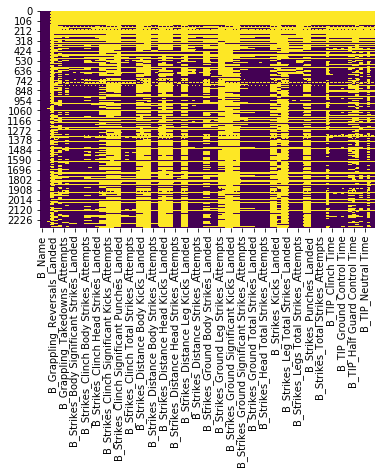

In [4]:
sns.heatmap(agg_B.mask(agg_B==0).isnull(),cmap='viridis',cbar=False)

In [5]:
cols_R =[]
for i in df.columns.tolist():
    if i[0:3]=='R__':
        cols_R.append(i[9:])
        
x = np.array(cols_R)
cols_R = np.unique(x).tolist()

In [6]:
agg_R= df[['R_Name',
 'R_ID',
 'R_Weight']]
for i in cols_R:
    agg_R['R_'+i[1:]] = 0
    for j  in range (1,6):
        agg_R['R_'+i[1:]] = agg_R['R_'+i[1:]] + df['R__Round'+str(j)+i].fillna(0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


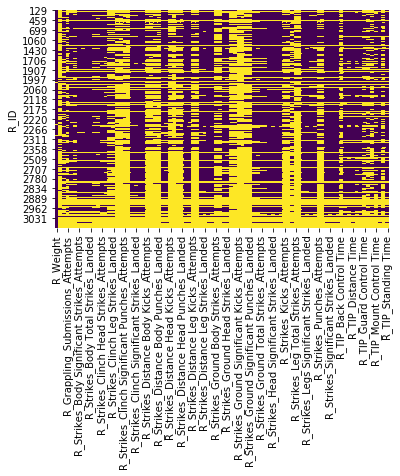

In [265]:
sns.heatmap(agg_R.mask(agg_R==0).isnull(),cmap='viridis',cbar=False)

# Let's start to aggregate into the same table

First we group by the fighter ID 

In [36]:
agg_B =agg_B.groupby('B_ID').mean()

In [37]:
agg_R =agg_R.groupby('R_ID').mean()

In [41]:
agg= pd.merge(agg_R,agg_B,how='inner', left_index=True, right_index=True)   

In [46]:
result = pd.DataFrame()
for i in agg.columns.tolist():
    if i[0] =='R':
        result[i[2:]] = (agg[i] +agg['B_'+i[2:]])/2

In [61]:
result = result.drop('Weight',axis=1)

We actually have a resulting dataframe with fighters ID and their mean stats across all their fights


### Now let's apply PCA 

But first we need to delete the highly correlated features. If two features have a correlation higher tha 0.9 we drop them

In [118]:
result.corr()

,Grappling_Reversals_Landed,Grappling_Standups_Landed,Grappling_Submissions_Attempts,Grappling_Takedowns_Attempts,Grappling_Takedowns_Landed,Strikes_Body Significant Strikes_Attempts,Strikes_Body Significant Strikes_Landed,Strikes_Body Total Strikes_Attempts,Strikes_Body Total Strikes_Landed,Strikes_Clinch Body Strikes_Attempts,...,TIP_Distance Time,TIP_Ground Control Time,TIP_Ground Time,TIP_Guard Control Time,TIP_Half Guard Control Time,TIP_Misc. Ground Control Time,TIP_Mount Control Time,TIP_Neutral Time,TIP_Side Control Time,TIP_Standing Time
Grappling_Reversals_Landed,1.000000,0.298254,0.268642,0.133763,0.137762,0.148302,0.139872,0.176607,0.170617,0.177645,...,0.049591,0.153729,0.255642,0.080645,0.072565,0.038128,0.113101,0.059805,0.181353,0.073268
Grappling_Standups_Landed,0.298254,1.000000,0.324716,0.252738,0.221109,0.476951,0.472117,0.482944,0.462675,0.387622,...,0.415372,0.204295,0.434215,0.073983,0.125588,0.086311,0.150599,0.422128,0.166167,0.477618
Grappling_Submissions_Attempts,0.268642,0.324716,1.000000,0.376277,0.375181,0.274938,0.287458,0.316643,0.323188,0.260720,...,0.211611,0.408419,0.476974,0.117231,0.320765,0.169711,0.289659,0.226148,0.248345,0.252777
Grappling_Takedowns_Attempts,0.133763,0.252738,0.376277,1.000000,0.914703,0.343912,0.353839,0.523551,0.557610,0.366931,...,0.362835,0.614315,0.564480,0.349073,0.534538,0.271881,0.364750,0.383390,0.347564,0.462365
Grappling_Takedowns_Landed,0.137762,0.221109,0.375181,0.914703,1.000000,0.318626,0.336630,0.499897,0.541260,0.331548,...,0.305029,0.654107,0.577488,0.367354,0.564787,0.330372,0.399862,0.322825,0.357171,0.390521
Strikes_Body Significant Strikes_Attempts,0.148302,0.476951,0.274938,0.343912,0.318626,1.000000,0.977117,0.905656,0.827588,0.684967,...,0.709877,0.252321,0.343080,0.147631,0.222529,0.146635,0.126734,0.720260,0.146073,0.750757
Strikes_Body Significant Strikes_Landed,0.139872,0.472117,0.287458,0.353839,0.336630,0.977117,1.000000,0.898526,0.854127,0.746596,...,0.683110,0.275364,0.356025,0.148410,0.258525,0.171803,0.140352,0.696784,0.155971,0.736033
Strikes_Body Total Strikes_Attempts,0.176607,0.482944,0.316643,0.523551,0.499897,0.905656,0.898526,1.000000,0.980563,0.719796,...,0.634458,0.426543,0.481279,0.267644,0.397659,0.200565,0.219897,0.651857,0.245774,0.704844
Strikes_Body Total Strikes_Landed,0.170617,0.462675,0.323188,0.557610,0.541260,0.827588,0.854127,0.980563,1.000000,0.737570,...,0.571441,0.473165,0.509398,0.291471,0.454397,0.223368,0.246257,0.592009,0.269996,0.654406
Strikes_Clinch Body Strikes_Attempts,0.177645,0.387622,0.260720,0.366931,0.331548,0.684967,0.746596,0.719796,0.737570,1.000000,...,0.377697,0.252253,0.304633,0.129024,0.251204,0.149590,0.140503,0.404633,0.082717,0.476995


In [122]:
corr = result.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = result.columns[columns]

result_bis = result[selected_columns]

Now that we reduced the number of features, let's  have fun , first scale the data than apply PCA

In [142]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(result_bis)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [143]:
scaled_data = scaler2.transform(result_bis)

In [177]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)

In [178]:
scaled_data.shape

(691, 38)

In [179]:
df_comp = pd.DataFrame(pca.components_,columns=result_bis.columns)

## Analysis of PCA : 

After reducing the feature to 5, we can have a sense of what grouping of fighter styles are responsible of the variance of the data.

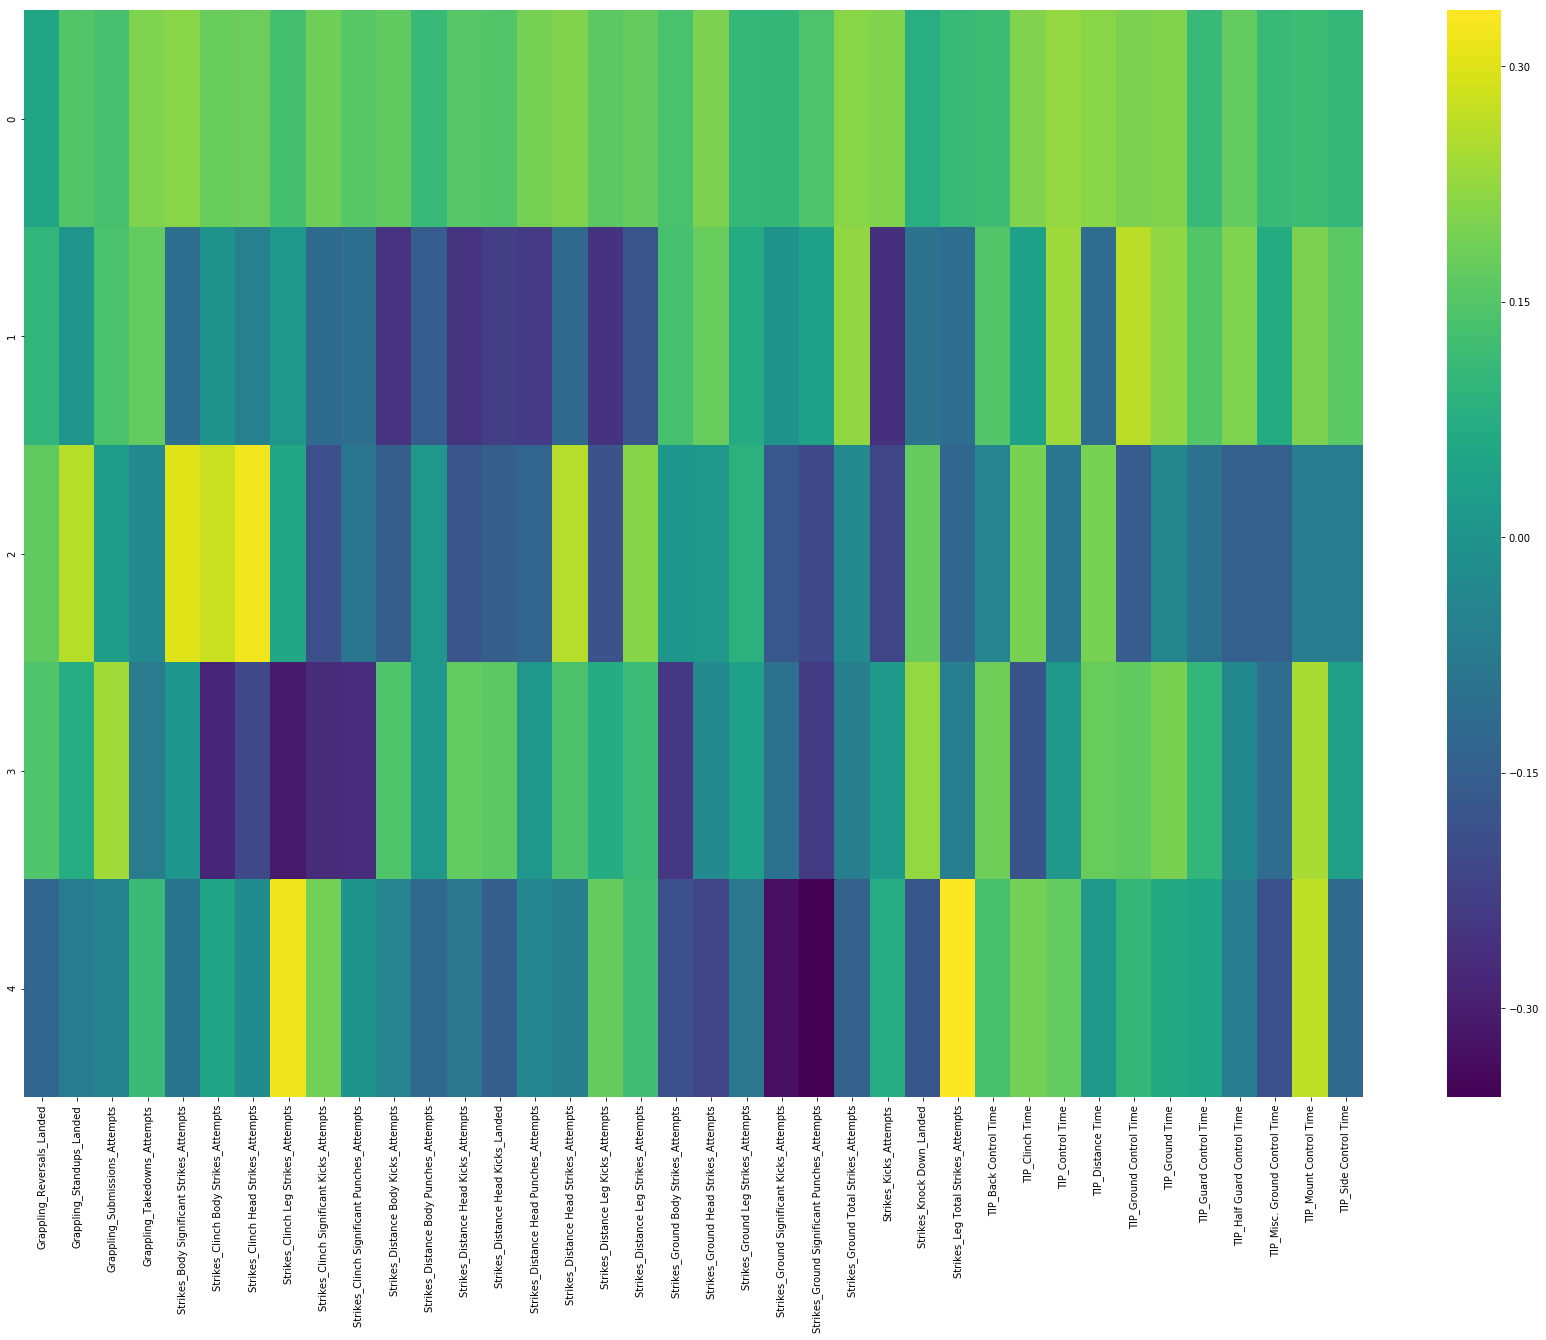

In [180]:
plt.figure(figsize=(30,20))
sns.heatmap(df_comp,cmap='viridis')

We could maybe have more groups but we we'll stick with 5 categories.

The insight the PCA gave us  are pretty interesseting. The strength of the combination of the original features gives us a look into which  features explain the variety of fighting styles in the UFC

In [270]:
sum(pca.explained_variance_ratio_)

0.5692497530840318

In [184]:
df_comp.loc[4].sort_values(ascending=False)[0:10]

Strikes_Leg Total Strikes_Attempts           0.335641
Strikes_Clinch Leg Strikes_Attempts          0.319116
TIP_Mount Control Time                       0.267034
TIP_Clinch Time                              0.187386
Strikes_Clinch Significant Kicks_Attempts    0.187309
Strikes_Distance Leg Kicks_Attempts          0.172245
TIP_Control Time                             0.168497
TIP_Back Control Time                        0.133728
Strikes_Distance Leg Strikes_Attempts        0.123677
Grappling_Takedowns_Attempts                 0.112012
Name: 4, dtype: float64

In [186]:
df_comp.loc[4].sort_values()[0:10]

Strikes_Ground Significant Punches_Attempts   -0.356793
Strikes_Ground Significant Kicks_Attempts     -0.331809
Strikes_Ground Head Strikes_Attempts          -0.218538
Strikes_Ground Body Strikes_Attempts          -0.187797
TIP_Misc. Ground Control Time                 -0.184458
Strikes_Knock Down_Landed                     -0.172343
Strikes_Distance Head Kicks_Landed            -0.153182
Strikes_Ground Total Strikes_Attempts         -0.137874
Grappling_Reversals_Landed                    -0.133805
Strikes_Distance Body Punches_Attempts        -0.123823
Name: 4, dtype: float64

# Applying K -mean 

In [272]:
from sklearn.cluster import KMeans

In [273]:
kmeans = KMeans(n_clusters=4)

In [274]:
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [275]:
df_result =pd.DataFrame(X_pca)
df_result['label']= pd.Series(kmeans.labels_)
df_result['f_ID']= agg.index.tolist()
labeled_df=pd.merge(df_result,df[['R_Name','R_ID']].drop_duplicates(),how='inner',left_on='f_ID',right_on='R_ID')

In [276]:
labeled_df.head()

,0,1,2,3,4,label,f_ID,R_Name,R_ID
0,-1.613073,-0.360193,-0.623921,-0.404684,-0.921742,1,129,Dan Henderson,129
1,-1.604400,-1.406730,1.465305,0.825537,0.026747,1,235,Anderson Silva,235
2,-3.650250,-0.366530,-0.883760,-0.268709,0.047427,1,272,Minotauro Nogueira,272
3,-2.919247,-0.423066,-0.049043,-0.200837,-0.168600,1,295,Vitor Belfort,295
4,-2.156389,0.706395,-0.725014,-0.213826,0.371471,1,306,Soa Palelei,306


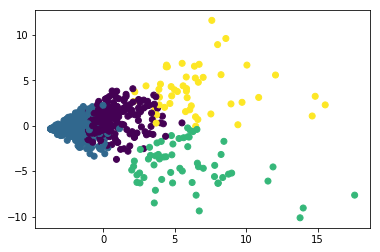

In [277]:
plt.scatter(df_result.iloc[:,0],df_result.iloc[:,1],c=kmeans.labels_)

### Plotting the Clusters in 3D 

<IPython.core.display.Javascript object>


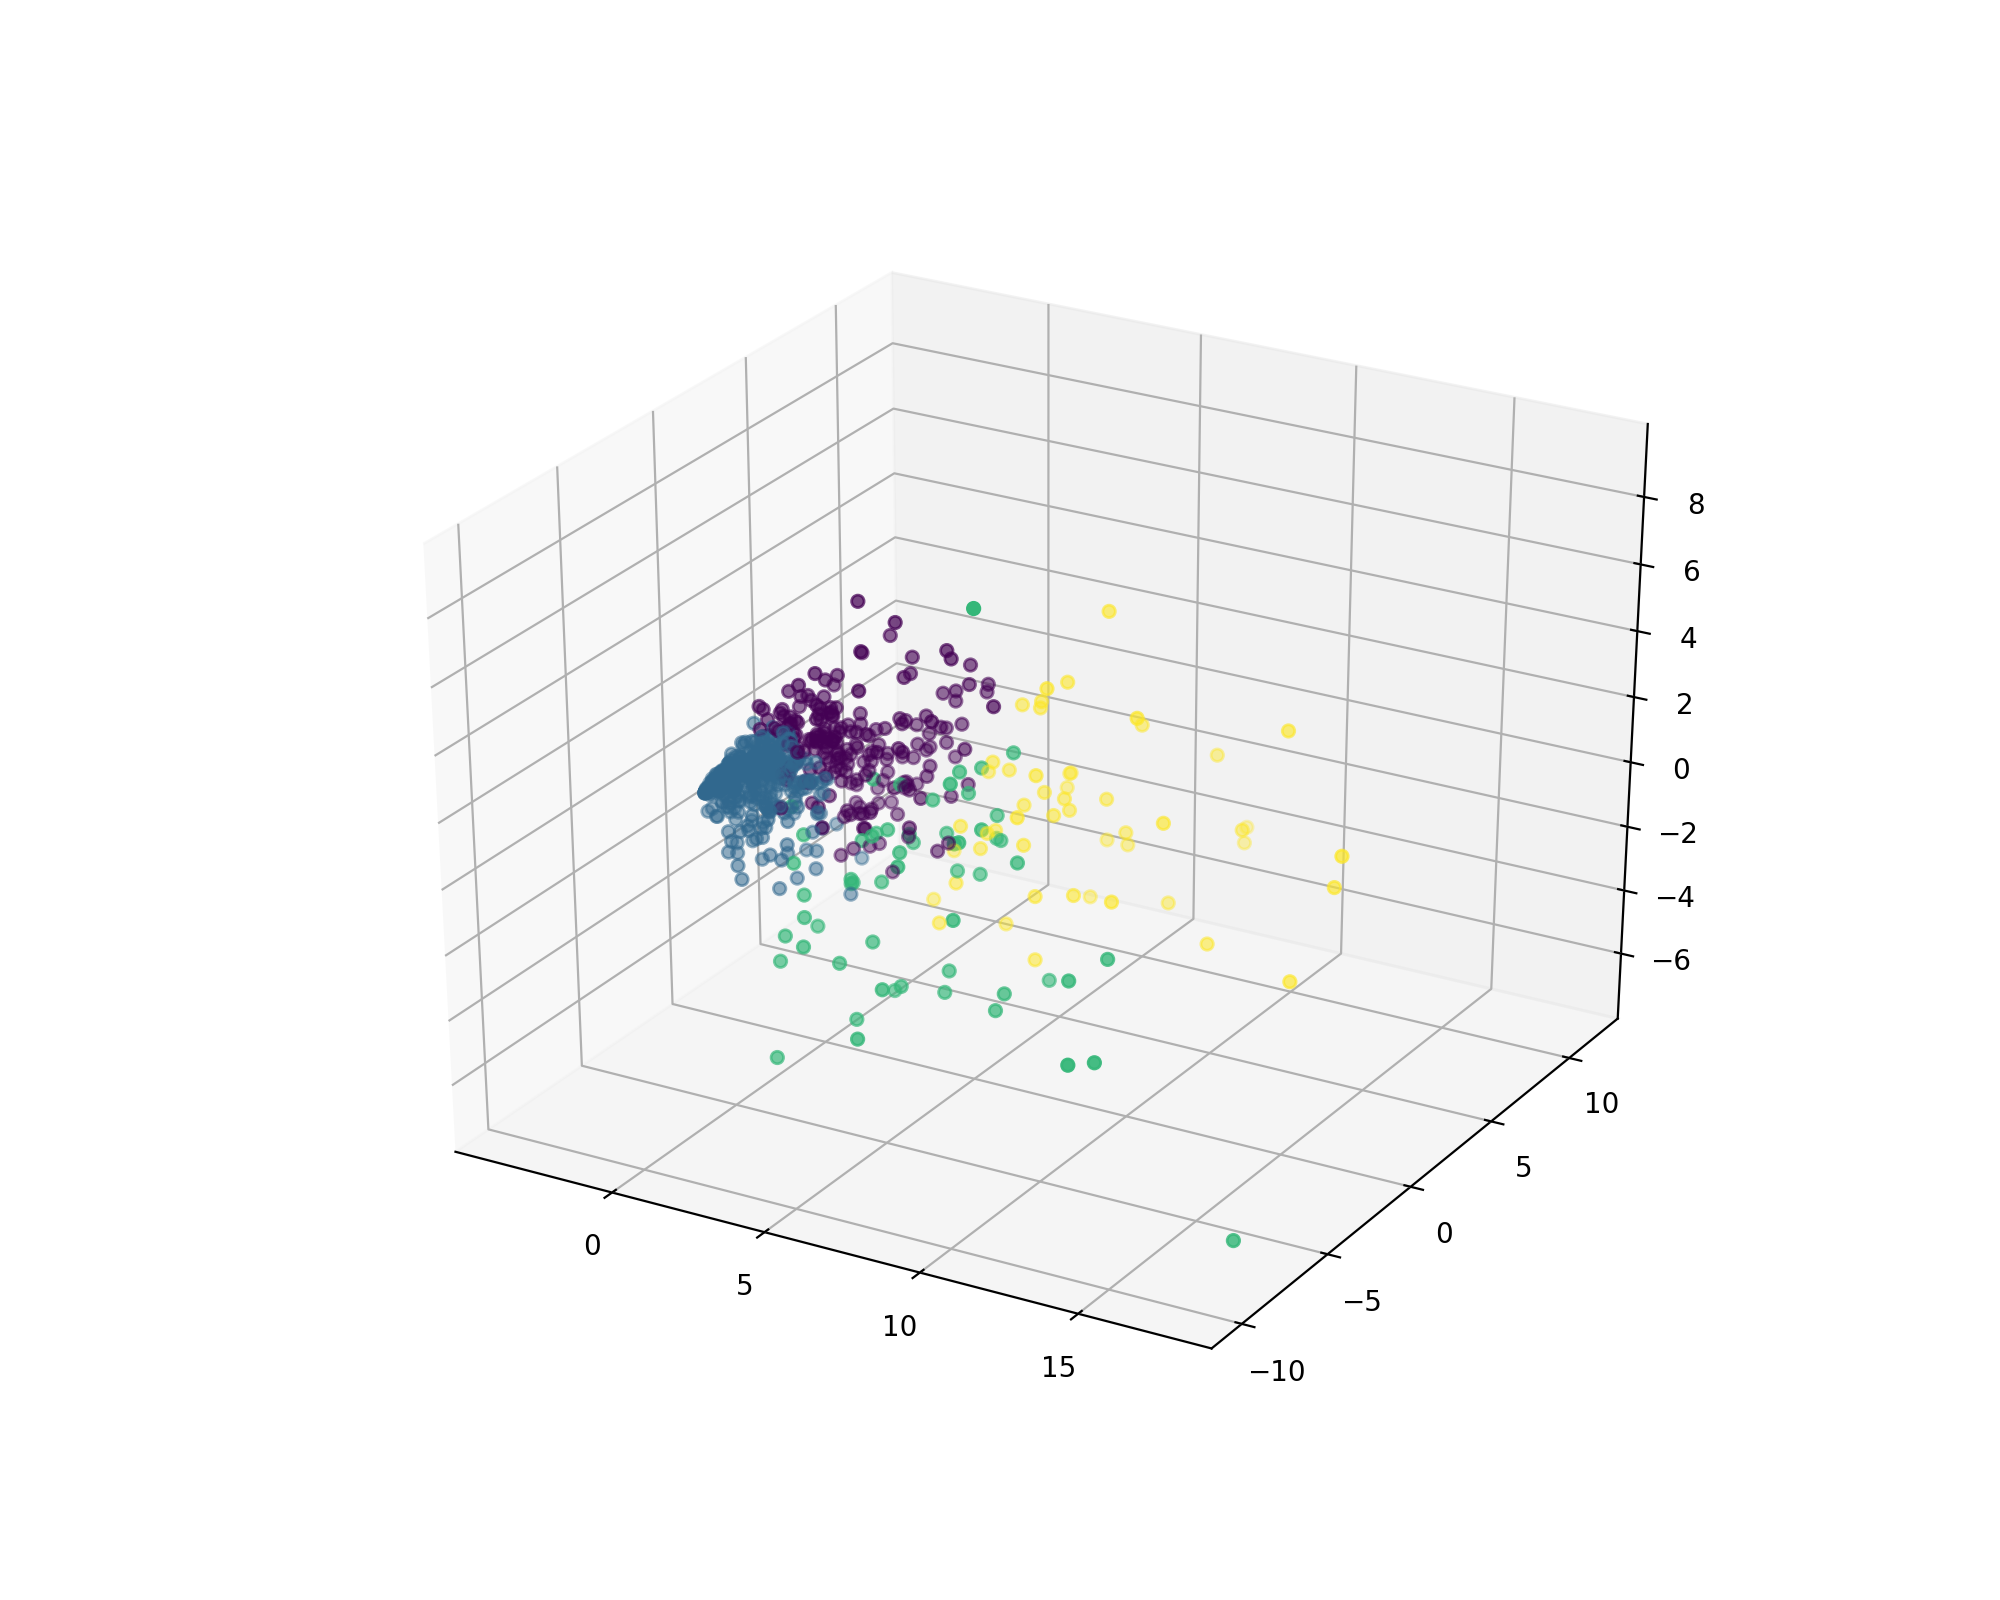

In [284]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_result.iloc[:,0],df_result.iloc[:,1],df_result.iloc[:,2],c=kmeans.labels_,cmap='viridis')